In [25]:
#using a tree-based feature reduction algorithm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
import pandas as pd

DATAPATH='C:\\Users\\CodeB\\Documents\\GitHub\\Hack-H-er413\\model\\clean_categorical_float_imputed_mean.csv'
df=pd.read_csv(DATAPATH)
df_majority=df[df['hospital_death']==0]
df_minority=df[df['hospital_death']==1]
print(df_majority.shape[0])
df_majority_downsampled = df_majority.sample(replace=False,    # sample without replacement
                                             n=df_minority.shape[0],
                                             random_state=0)     # to match minority class    #reproducible results
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
working_df=df_downsampled.sample(replace=False,
                                 frac=0.1,
                                 random_state=0)
print (df_downsampled.shape)


83798
(15830, 112)


In [26]:
y=working_df.pop('hospital_death')
X=working_df
#y=y.to_numpy()
#X=X.to_numpy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [27]:
#SELECT DATA FOR TESTING

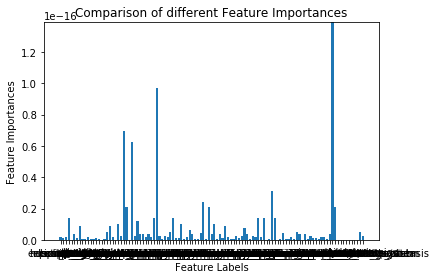

In [28]:
#df=df.to_numpy()
#need to insert dataset below
#X=X.to_numpy()
#y=y.to_numpy()
#X.shape

#GET IMPORTANT FEATURES
#clf=classifier :))#

clf = ExtraTreesClassifier(n_estimators=50, min_samples_leaf=10, max_features=15)
#n_estimtors = number of trees in forest
#min_samples_split= minumum number before node splitting in tree, maybe 5
#min_samples_leaf
#max_features
clf = clf.fit(X_train, y_train)
clf.feature_importances_ 
feature_importance_normalized = np.std([clf.feature_importances_ for tree in clf.estimators_], 
                                        axis = 0) 
plt.bar(X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

In [ ]:
#MODIFY INPUT
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape


In [ ]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
#plot feature importance
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
#TRAIN DECISION TREE
from sklearn import tree